# PART A: Data Engineering

### Q1 Load the train_series.csv file and pivot the time-dependent columns (PAY, BILL_AMT, and PAY_AMT) to build one column of these per month. (Ex. PAY_JUNE, PAY_MAY, ..., BILL_AMT_JUNE, ...)

In [4]:
import pandas as pd

In [5]:
df = pd.read_csv("train_series.csv")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   ID        120000 non-null  int64  
 1   MONTH     120000 non-null  object 
 2   PAY       120000 non-null  float64
 3   BILL_AMT  120000 non-null  float64
 4   PAY_AMT   120000 non-null  float64
dtypes: float64(3), int64(1), object(1)
memory usage: 4.6+ MB


In [7]:
df.head(6)

,ID,MONTH,PAY,BILL_AMT,PAY_AMT
0,9910,JUNE,0.0,76885.0,3500.0
1,9910,MAY,0.0,79106.0,4000.0
2,9910,APRIL,0.0,81231.0,3000.0
3,9910,MARCH,0.0,81983.0,3146.0
4,9910,FEBRUARY,0.0,83773.0,3260.0
5,9910,JANUARY,0.0,85532.0,3200.0


In [8]:
piv = df.pivot(index="ID", columns="MONTH", values=["PAY", "BILL_AMT", "PAY_AMT"])

In [9]:
piv.head()

PAY                                   BILL_AMT                      \
MONTH APRIL FEBRUARY JANUARY JUNE MARCH  MAY     APRIL  FEBRUARY   JANUARY   
ID                                                                           
0       0.0     -1.0     0.0 -1.0   0.0  0.0   13600.0   44024.0   18697.0   
1       0.0      0.0     0.0  0.0   0.0  0.0   53169.0   50372.0   49470.0   
2       2.0      2.0     2.0  2.0   2.0  2.0  161487.0  168094.0  170922.0   
3      -2.0     -2.0    -2.0 -2.0  -2.0 -2.0       0.0       0.0       0.0   
4       0.0      0.0     0.0  0.0   0.0  0.0    9044.0    9417.0    9617.0   

                                    PAY_AMT                            \
MONTH      JUNE     MARCH       MAY   APRIL FEBRUARY  JANUARY    JUNE   
ID                                                                      
0       28991.0       0.0   24391.0     0.0    680.0  10000.0  1300.0   
1       75662.0   50875.0   70073.0  2000.0   1903.0   2006.0  3212.0   
2      155910.0  157577.0  158819.0     0.0   5500.0   1000.0  6800.0   
3       23570.0       0.0     735.0     0.0      0.0      0.0   742.0   
4        8214.0    9225.0    8034.0   331.0    356.0    330.0  1140.0   

                        
MONTH    MARCH     MAY  
ID                      
0      22373.0  1000.0  
1       1603.0  2106.0  
2      13000.0  6500.0  
3          0.0     0.0  
4        341.0  1150.0

In [10]:
piv.columns = list(map("_".join, piv.columns))

In [11]:
piv.head()

,PAY_APRIL,PAY_FEBRUARY,PAY_JANUARY,PAY_JUNE,PAY_MARCH,PAY_MAY,BILL_AMT_APRIL,BILL_AMT_FEBRUARY,BILL_AMT_JANUARY,BILL_AMT_JUNE,BILL_AMT_MARCH,BILL_AMT_MAY,PAY_AMT_APRIL,PAY_AMT_FEBRUARY,PAY_AMT_JANUARY,PAY_AMT_JUNE,PAY_AMT_MARCH,PAY_AMT_MAY
ID,,,,,,,,,,,,,,,,,,
0,0.0,-1.0,0.0,-1.0,0.0,0.0,13600.0,44024.0,18697.0,28991.0,0.0,24391.0,0.0,680.0,10000.0,1300.0,22373.0,1000.0
1,0.0,0.0,0.0,0.0,0.0,0.0,53169.0,50372.0,49470.0,75662.0,50875.0,70073.0,2000.0,1903.0,2006.0,3212.0,1603.0,2106.0
2,2.0,2.0,2.0,2.0,2.0,2.0,161487.0,168094.0,170922.0,155910.0,157577.0,158819.0,0.0,5500.0,1000.0,6800.0,13000.0,6500.0
3,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,0.0,0.0,0.0,23570.0,0.0,735.0,0.0,0.0,0.0,742.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,9044.0,9417.0,9617.0,8214.0,9225.0,8034.0,331.0,356.0,330.0,1140.0,341.0,1150.0


## Load train_customers.csv and include the pivoted table of time series data. The resulting table must be a table with one row per customer (ID)

In [12]:
dfc = pd.read_csv("train_customers.csv")

In [13]:
dfc.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE
0,9910,130000.0,2,2,1,27
1,15561,60000.0,2,3,1,48
2,23607,330000.0,2,1,2,44
3,6314,60000.0,2,2,2,24
4,27534,180000.0,2,1,2,33


In [14]:
left_df = piv.merge(dfc, how='left', on='ID')

In [15]:
left_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 0 to 19999
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 20000 non-null  int64  
 1   PAY_APRIL          20000 non-null  float64
 2   PAY_FEBRUARY       20000 non-null  float64
 3   PAY_JANUARY        20000 non-null  float64
 4   PAY_JUNE           20000 non-null  float64
 5   PAY_MARCH          20000 non-null  float64
 6   PAY_MAY            20000 non-null  float64
 7   BILL_AMT_APRIL     20000 non-null  float64
 8   BILL_AMT_FEBRUARY  20000 non-null  float64
 9   BILL_AMT_JANUARY   20000 non-null  float64
 10  BILL_AMT_JUNE      20000 non-null  float64
 11  BILL_AMT_MARCH     20000 non-null  float64
 12  BILL_AMT_MAY       20000 non-null  float64
 13  PAY_AMT_APRIL      20000 non-null  float64
 14  PAY_AMT_FEBRUARY   20000 non-null  float64
 15  PAY_AMT_JANUARY    20000 non-null  float64
 16  PAY_AMT_JUNE       200

## Include information from the target (train_target.csv) on the table

In [16]:
dft = pd.read_csv("train_target.csv")

In [17]:
full_df = left_df.merge(dft, how='left', on='ID')

In [18]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 0 to 19999
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 20000 non-null  int64  
 1   PAY_APRIL          20000 non-null  float64
 2   PAY_FEBRUARY       20000 non-null  float64
 3   PAY_JANUARY        20000 non-null  float64
 4   PAY_JUNE           20000 non-null  float64
 5   PAY_MARCH          20000 non-null  float64
 6   PAY_MAY            20000 non-null  float64
 7   BILL_AMT_APRIL     20000 non-null  float64
 8   BILL_AMT_FEBRUARY  20000 non-null  float64
 9   BILL_AMT_JANUARY   20000 non-null  float64
 10  BILL_AMT_JUNE      20000 non-null  float64
 11  BILL_AMT_MARCH     20000 non-null  float64
 12  BILL_AMT_MAY       20000 non-null  float64
 13  PAY_AMT_APRIL      20000 non-null  float64
 14  PAY_AMT_FEBRUARY   20000 non-null  float64
 15  PAY_AMT_JANUARY    20000 non-null  float64
 16  PAY_AMT_JUNE       200

In [301]:
full_df.to_csv('DrozdSzymon_A_train.csv',index=False)

# PART B: EDA

## BAR PLOT: Plot the distribution of defaulters given the Education. Comment the results.

In [124]:
data = full_df

In [202]:
data.head().T

,0,1,2,3,4
ID,0,1,2,3,4
PAY_APRIL,0.0,0.0,2.0,-2.0,0.0
PAY_FEBRUARY,-1.0,0.0,2.0,-2.0,0.0
PAY_JANUARY,0.0,0.0,2.0,-2.0,0.0
PAY_JUNE,-1.0,0.0,2.0,-2.0,0.0
PAY_MARCH,0.0,0.0,2.0,-2.0,0.0
PAY_MAY,0.0,0.0,2.0,-2.0,0.0
BILL_AMT_APRIL,13600.0,53169.0,161487.0,0.0,9044.0
BILL_AMT_FEBRUARY,44024.0,50372.0,168094.0,0.0,9417.0
BILL_AMT_JANUARY,18697.0,49470.0,170922.0,0.0,9617.0


In [142]:
data['DEFAULT_JULY_1'] = data['DEFAULT_JULY']==1

In [157]:
data['DEFAULT_JULY_0'] = data['DEFAULT_JULY']==0

In [171]:
aggr = data.groupby('EDUCATION', as_index=False).sum()

In [173]:
aggr = aggr.drop(index=0)

In [176]:
aggr = aggr[['EDUCATION','DEFAULT_JULY','DEFAULT_JULY_1', 'DEFAULT_JULY_0']]

In [179]:
aggr.head(6)

,EDUCATION,DEFAULT_JULY,DEFAULT_JULY_1,DEFAULT_JULY_0
1,graduate school,1336,1336,5749
2,university,2225,2225,7065
3,high shool,836,836,2472
4,others,6,6,89
5,unknown,15,15,167
6,unknown2,2,2,31


In [178]:
aggr['EDUCATION']=aggr['EDUCATION'].replace([1,2,3,4,5,6],['graduate school','university','high shool','others','unknown','unknown2'])

In [131]:
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go

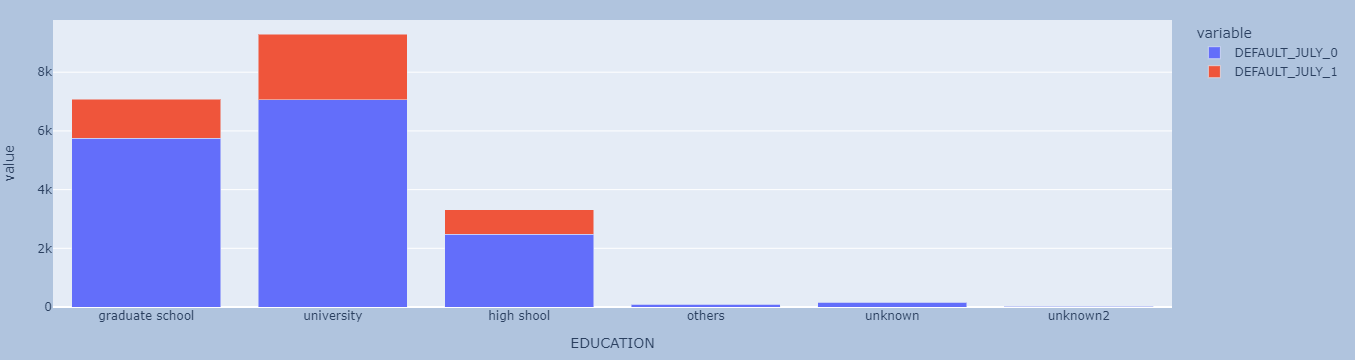

In [180]:
fig = px.bar(aggr, x='EDUCATION', y=['DEFAULT_JULY_0','DEFAULT_JULY_1'], barmode="stack")
fig.update_layout(
    margin=dict(l=20, r=20, t=20, b=20),
    paper_bgcolor="LightSteelBlue",
)
fig.show()

#### Comment on results: University graduates by far the most numerous group, as well as is the most numerous it defaults in July. Because of the discrepency in group sizes the ratio of defaults will be analyzed in a later graph. Also from this bar graph again because of groups sizes others, and unknown values probably will not be as relevant. 

In [196]:
aggr.head()

,EDUCATION,DEFAULT_JULY,DEFAULT_JULY_1,DEFAULT_JULY_0,DEFAULT_JULY_1_PER
1,graduate school,7085,1336,5749,0.188567
2,university,9290,2225,7065,0.239505
3,high shool,3308,836,2472,0.252721
4,others,95,6,89,0.063158
5,unknown,182,15,167,0.082418


In [188]:
aggr2.head()

,EDUCATION,ID,PAY_APRIL,PAY_FEBRUARY,PAY_JANUARY,PAY_JUNE,PAY_MARCH,PAY_MAY,BILL_AMT_APRIL,BILL_AMT_FEBRUARY,...,PAY_AMT_JUNE,PAY_AMT_MARCH,PAY_AMT_MAY,LIMIT_BAL,SEX,MARRIAGE,AGE,DEFAULT_JULY,DEFAULT_JULY_1,DEFAULT_JULY_0
0,0,7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,7,7,7
1,1,7085,7085,7085,7085,7085,7085,7085,7085,7085,...,7085,7085,7085,7085,7085,7085,7085,7085,7085,7085
2,2,9290,9290,9290,9290,9290,9290,9290,9290,9290,...,9290,9290,9290,9290,9290,9290,9290,9290,9290,9290
3,3,3308,3308,3308,3308,3308,3308,3308,3308,3308,...,3308,3308,3308,3308,3308,3308,3308,3308,3308,3308
4,4,95,95,95,95,95,95,95,95,95,...,95,95,95,95,95,95,95,95,95,95


In [186]:
aggr2 = data.groupby('EDUCATION', as_index=False).count()

In [189]:
aggr2 = aggr2.drop(index=0)

In [191]:
aggr['DEFAULT_JULY'] = aggr2['DEFAULT_JULY']

In [195]:
aggr['DEFAULT_JULY_1_PER'] = aggr['DEFAULT_JULY_1']/aggr['DEFAULT_JULY']

In [198]:
aggr['DEFAULT_JULY_0_PER'] = aggr['DEFAULT_JULY_0']/aggr['DEFAULT_JULY']

In [201]:
aggr.head(6)

,EDUCATION,DEFAULT_JULY,DEFAULT_JULY_1,DEFAULT_JULY_0,DEFAULT_JULY_1_PER,DEFAULT_JULY_0_PER
1,graduate school,7085,1336,5749,0.188567,0.811433
2,university,9290,2225,7065,0.239505,0.760495
3,high shool,3308,836,2472,0.252721,0.747279
4,others,95,6,89,0.063158,0.936842
5,unknown,182,15,167,0.082418,0.917582
6,unknown2,33,2,31,0.060606,0.939394


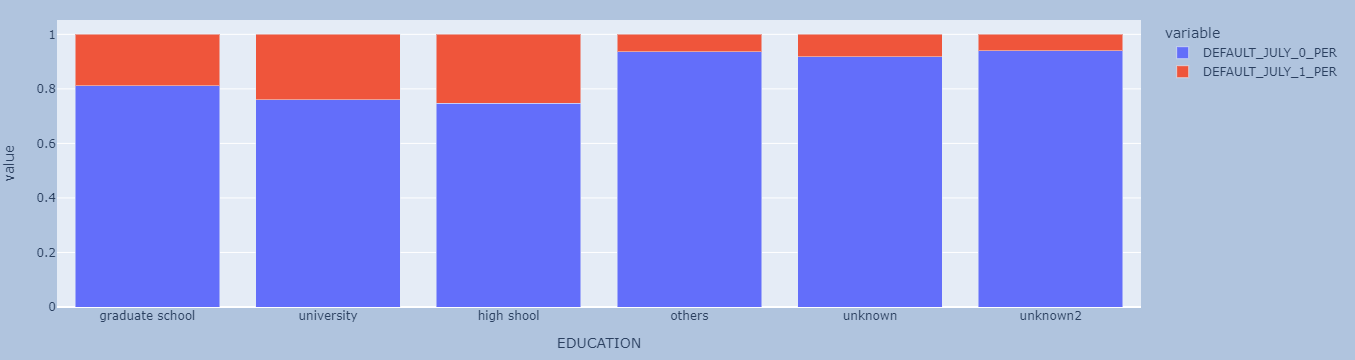

In [200]:
fig = px.bar(aggr, x='EDUCATION', y=['DEFAULT_JULY_0_PER','DEFAULT_JULY_1_PER'], barmode="stack")
fig.update_layout(
    margin=dict(l=20, r=20, t=20, b=20),
    paper_bgcolor="LightSteelBlue",
)
fig.show()

#### Comment on the results: Although university graduates are responsible for most defaults in July, high school graduates have slightly higher raito of defaulting. Customers with graduate degree by far are the least likely to default.

## BOX PLOT - Plot the distribution of `LIMIT_BAL` per defaulters and non-defaulters. Comment the results.

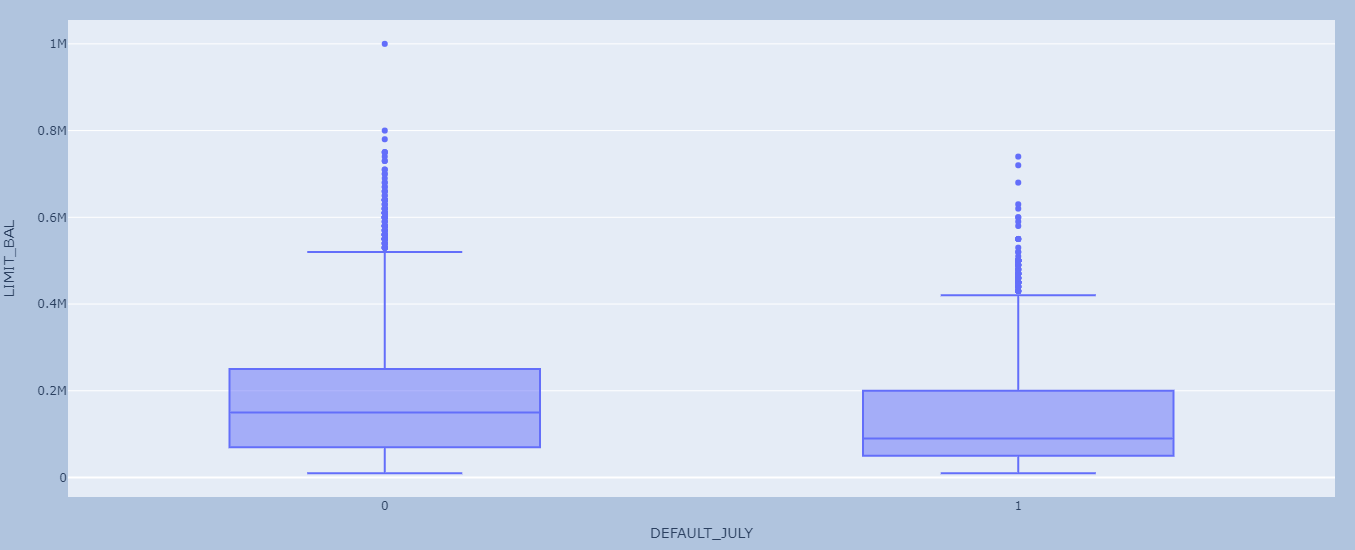

In [182]:
fig = px.box(data, x="DEFAULT_JULY", y="LIMIT_BAL", height=550, width=600)
fig.update_layout(
    margin=dict(l=20, r=20, t=20, b=20),
    paper_bgcolor="LightSteelBlue",
)
fig.show()

#### Comment on results: From boxplots we can see that the quartiles and median are larger for 0 = "no" which indicates that generally people who do not default receive larger credits

## Include 3 more interesting insights extracted from the data. Provide an explanation of the choices made and the results obtained.

### 1. Married default ratio

In [203]:
data.head()

,ID,PAY_APRIL,PAY_FEBRUARY,PAY_JANUARY,PAY_JUNE,PAY_MARCH,PAY_MAY,BILL_AMT_APRIL,BILL_AMT_FEBRUARY,BILL_AMT_JANUARY,...,PAY_AMT_MARCH,PAY_AMT_MAY,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,DEFAULT_JULY,DEFAULT_JULY_1,DEFAULT_JULY_0
0,0,0.0,-1.0,0.0,-1.0,0.0,0.0,13600.0,44024.0,18697.0,...,22373.0,1000.0,40000.0,2,2,2,26,0,False,True
1,1,0.0,0.0,0.0,0.0,0.0,0.0,53169.0,50372.0,49470.0,...,1603.0,2106.0,80000.0,2,3,1,59,0,False,True
2,2,2.0,2.0,2.0,2.0,2.0,2.0,161487.0,168094.0,170922.0,...,13000.0,6500.0,170000.0,2,1,2,30,1,True,False
3,3,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,0.0,0.0,0.0,...,0.0,0.0,200000.0,2,2,1,41,1,True,False
4,4,0.0,0.0,0.0,0.0,0.0,0.0,9044.0,9417.0,9617.0,...,341.0,1150.0,50000.0,1,2,1,43,0,False,True


In [207]:
aggr3 = data.groupby('MARRIAGE', as_index=False).sum()

In [209]:
aggr3 = aggr3[['MARRIAGE','DEFAULT_JULY','DEFAULT_JULY_1', 'DEFAULT_JULY_0']]

In [211]:
aggr3 = aggr3.drop(index=0)

In [225]:
aggr3.head()

,MARRIAGE,DEFAULT_JULY,DEFAULT_JULY_1,DEFAULT_JULY_0,DEFAULT_SUM,DEFAULT_1_MAR_PER,DEFAULT_0_MAR_PER
1,married,2152,2152,6991,9143,0.235371,0.764629
2,single,2203,2203,8402,10605,0.207732,0.792268
3,others,61,61,155,216,0.282407,0.717593


In [213]:
aggr3['DEFAULT_SUM'] = aggr3['DEFAULT_JULY_1'] + aggr3['DEFAULT_JULY_0']

In [220]:
aggr3['DEFAULT_1_MAR_PER'] = aggr3['DEFAULT_JULY_1']/aggr3['DEFAULT_SUM']
aggr3['DEFAULT_0_MAR_PER'] = aggr3['DEFAULT_JULY_0']/aggr3['DEFAULT_SUM']

In [224]:
aggr3['MARRIAGE']=aggr3['MARRIAGE'].replace([1,2,3],['married','single','others'])

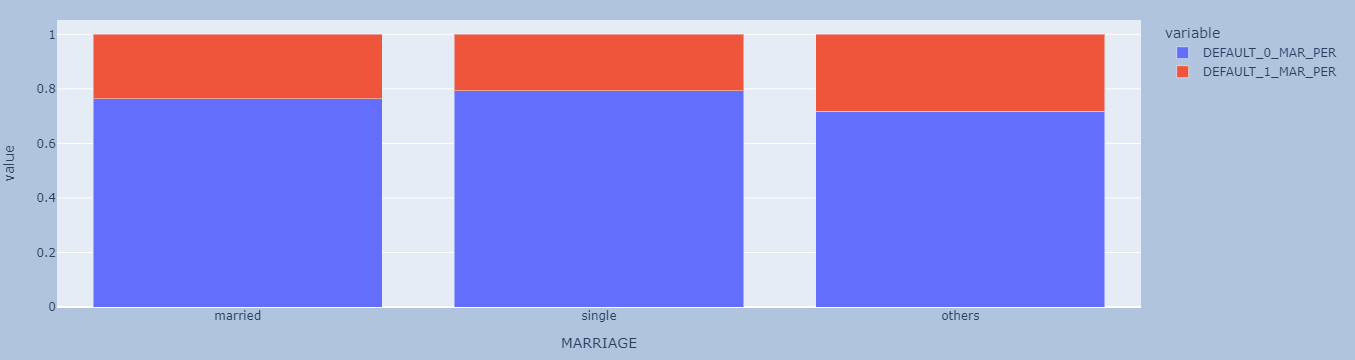

In [227]:
fig = px.bar(aggr3, x='MARRIAGE', y=['DEFAULT_0_MAR_PER','DEFAULT_1_MAR_PER'], barmode="stack")
fig.update_layout(
    margin=dict(l=20, r=20, t=20, b=20),
    paper_bgcolor="LightSteelBlue",
)
fig.show()

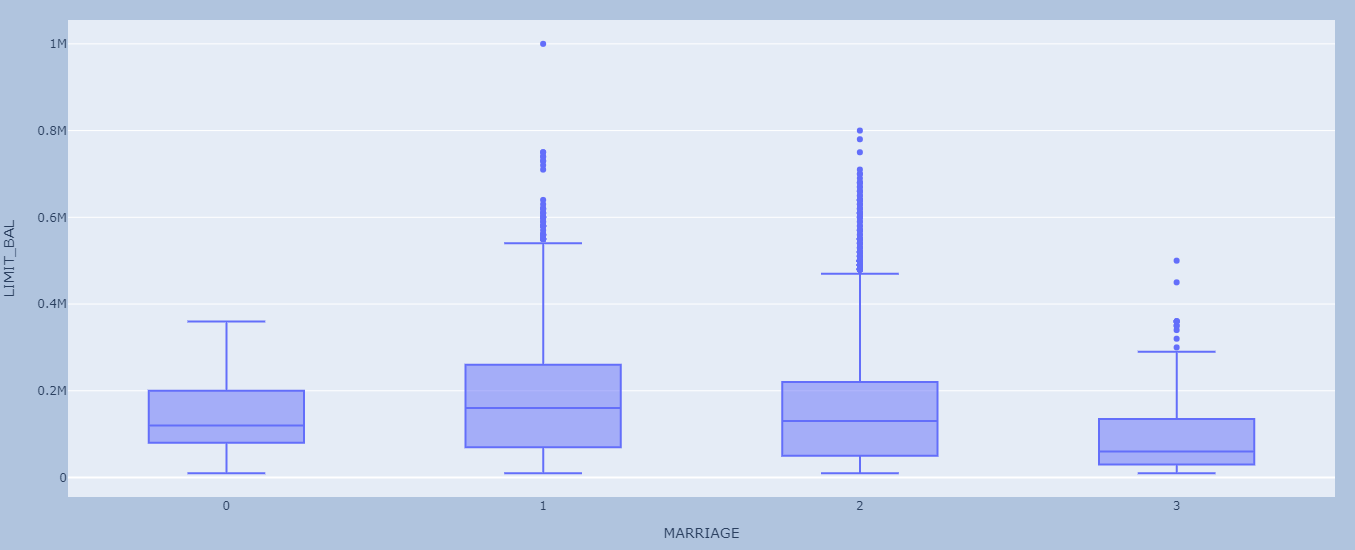

In [229]:
fig = px.box(data, x="MARRIAGE", y="LIMIT_BAL", height=550, width=600)
fig.update_layout(
    margin=dict(l=20, r=20, t=20, b=20),
    paper_bgcolor="LightSteelBlue",
)
fig.show()

#### Comment on results: Others has the highest percentage of defaults, however without more information on what this status means it is hard to interpet. However, it is easier to intepret the rest of the results. Marries status has higher percentage of defaults compared to single. This might be attributed to the fact that for example married couples buy homes using mortgages, which generally tend to be quite high. This insight is confirmed by the boxplot above as median of awarded credit for married status is 160k and for single status is 130k.

### 2. Defaults distribution by age

In [230]:
data.head()

,ID,PAY_APRIL,PAY_FEBRUARY,PAY_JANUARY,PAY_JUNE,PAY_MARCH,PAY_MAY,BILL_AMT_APRIL,BILL_AMT_FEBRUARY,BILL_AMT_JANUARY,...,PAY_AMT_MARCH,PAY_AMT_MAY,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,DEFAULT_JULY,DEFAULT_JULY_1,DEFAULT_JULY_0
0,0,0.0,-1.0,0.0,-1.0,0.0,0.0,13600.0,44024.0,18697.0,...,22373.0,1000.0,40000.0,2,2,2,26,0,False,True
1,1,0.0,0.0,0.0,0.0,0.0,0.0,53169.0,50372.0,49470.0,...,1603.0,2106.0,80000.0,2,3,1,59,0,False,True
2,2,2.0,2.0,2.0,2.0,2.0,2.0,161487.0,168094.0,170922.0,...,13000.0,6500.0,170000.0,2,1,2,30,1,True,False
3,3,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,0.0,0.0,0.0,...,0.0,0.0,200000.0,2,2,1,41,1,True,False
4,4,0.0,0.0,0.0,0.0,0.0,0.0,9044.0,9417.0,9617.0,...,341.0,1150.0,50000.0,1,2,1,43,0,False,True


In [233]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,20000.0,14940.65875,8652.819600,0.0,7460.75,14952.5,22439.50,29999.0
PAY_APRIL,20000.0,-0.16615,1.196710,-2.0,-1.00,0.0,0.00,8.0
PAY_FEBRUARY,20000.0,-0.26995,1.125718,-2.0,-1.00,0.0,0.00,8.0
PAY_JANUARY,20000.0,-0.29095,1.145366,-2.0,-1.00,0.0,0.00,8.0
PAY_JUNE,20000.0,-0.01750,1.121453,-2.0,-1.00,0.0,0.00,8.0
PAY_MARCH,20000.0,-0.22555,1.164880,-2.0,-1.00,0.0,0.00,8.0
PAY_MAY,20000.0,-0.13455,1.194955,-2.0,-1.00,0.0,0.00,7.0
BILL_AMT_APRIL,20000.0,47147.77655,69857.769754,-157264.0,2669.50,20312.5,59851.25,1664089.0
BILL_AMT_FEBRUARY,20000.0,40432.99830,60997.393453,-81334.0,1816.50,18336.0,50229.75,927171.0
BILL_AMT_JANUARY,20000.0,38993.69765,59870.487622,-73895.0,1280.00,17172.0,49075.50,961664.0


In [237]:
aggr4 = data.groupby('AGE', as_index=False).sum()

In [239]:
aggr4 = aggr4[['AGE','DEFAULT_JULY','DEFAULT_JULY_1', 'DEFAULT_JULY_0']]
aggr4 = aggr4.drop(index=0)

In [245]:
aggr4.head()

,AGE,DEFAULT_JULY,DEFAULT_JULY_1,DEFAULT_JULY_0,DEFAULT_SUM
1,22,115,115,270,385
2,23,172,172,472,644
3,24,193,193,556,749
4,25,190,190,604,794
5,26,168,168,665,833


In [244]:
aggr4['DEFAULT_SUM']=aggr4['DEFAULT_JULY_1'] + aggr4['DEFAULT_JULY_0']

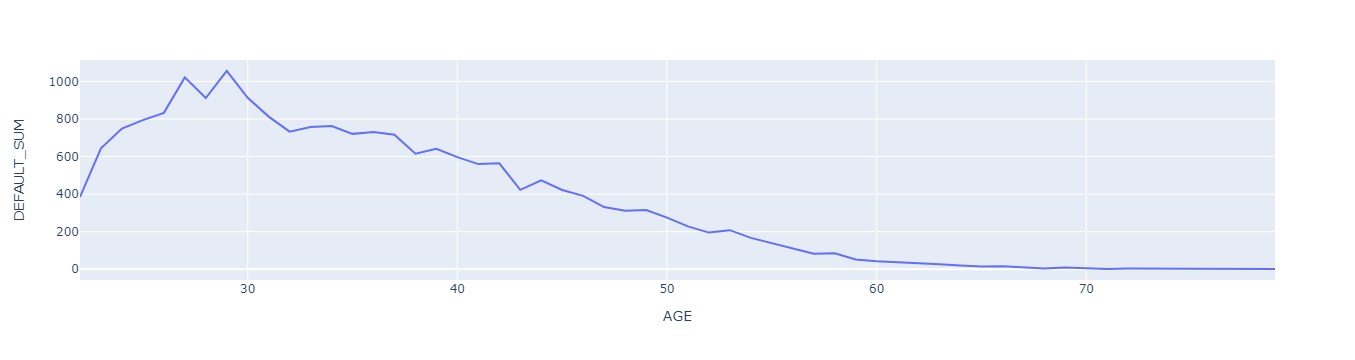

In [255]:
fig = px.line(aggr4, x='AGE', y='DEFAULT_SUM')
fig.show()

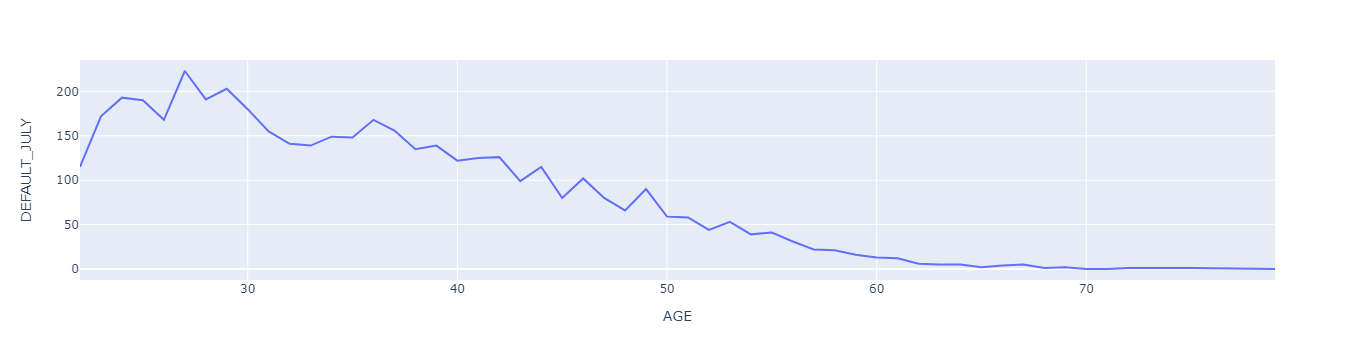

In [242]:
fig = px.line(aggr4, x='AGE', y='DEFAULT_JULY')
fig.show()

#### Comment on results: When comparing the line graph of total total credits given and defaults per age, we can see that the trend generally is the same which means there are no major discrepencies in defaulting per age. However age range 40-50 seems to have a lot of variance so this is important to keep in mind when building a model.

### 3.Sex default ratio

In [263]:
aggr5 = data.groupby('SEX', as_index=False).sum()
aggr5 = aggr5[['SEX','DEFAULT_JULY','DEFAULT_JULY_1', 'DEFAULT_JULY_0']]

In [269]:
aggr5.head()

,SEX,DEFAULT_JULY,DEFAULT_JULY_1,DEFAULT_JULY_0,DEFAULT_SUM,DEFAULT_1_SEX_PER,DEFAULT_0_SEX_PER
0,male,1890,1890,5994,7884,0.239726,0.760274
1,female,2530,2530,9586,12116,0.208815,0.791185


In [265]:
aggr5['SEX']=aggr5['SEX'].replace([1,2],['male','female'])

In [267]:
aggr5['DEFAULT_SUM'] = aggr5['DEFAULT_JULY_1'] + aggr5['DEFAULT_JULY_0']

In [268]:
aggr5['DEFAULT_1_SEX_PER'] = aggr5['DEFAULT_JULY_1']/aggr5['DEFAULT_SUM']
aggr5['DEFAULT_0_SEX_PER'] = aggr5['DEFAULT_JULY_0']/aggr5['DEFAULT_SUM']

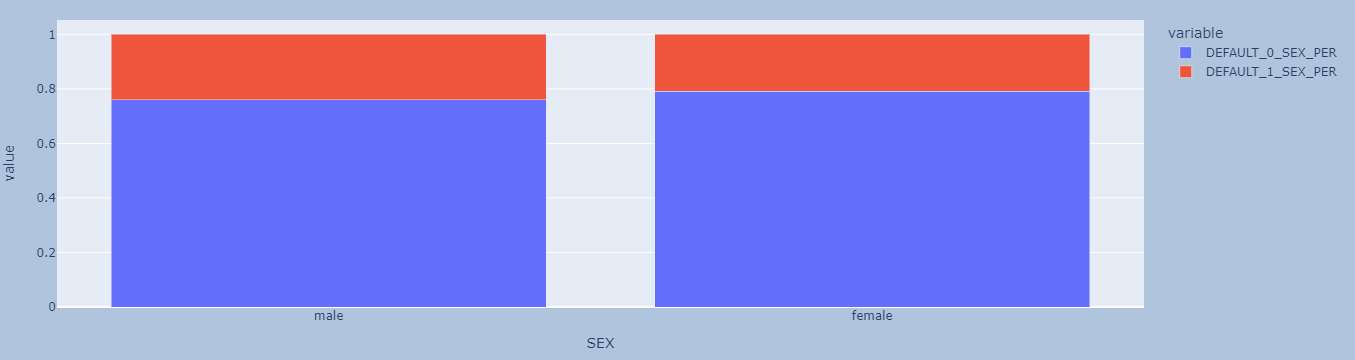

In [271]:
fig = px.bar(aggr5, x='SEX', y=['DEFAULT_0_SEX_PER','DEFAULT_1_SEX_PER'], barmode="stack")
fig.update_layout(
    margin=dict(l=20, r=20, t=20, b=20),
    paper_bgcolor="LightSteelBlue",
)
fig.show()

#### Comment on results: From the data we can see tha males are more like to default, however the total credits given should be taken into account. Total credits awarded to females is 12,116 and to males is 7,884. Therefore it is likely that if the sample of males was the same size as females the ratio could be almost the same.

# PART C: DATA ANALYTICS

In [3]:
test = pd.read_csv('test_data.csv')

In [19]:
full_df.head()

,ID,PAY_APRIL,PAY_FEBRUARY,PAY_JANUARY,PAY_JUNE,PAY_MARCH,PAY_MAY,BILL_AMT_APRIL,BILL_AMT_FEBRUARY,BILL_AMT_JANUARY,...,PAY_AMT_JANUARY,PAY_AMT_JUNE,PAY_AMT_MARCH,PAY_AMT_MAY,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,DEFAULT_JULY
0,0,0.0,-1.0,0.0,-1.0,0.0,0.0,13600.0,44024.0,18697.0,...,10000.0,1300.0,22373.0,1000.0,40000.0,2,2,2,26,0
1,1,0.0,0.0,0.0,0.0,0.0,0.0,53169.0,50372.0,49470.0,...,2006.0,3212.0,1603.0,2106.0,80000.0,2,3,1,59,0
2,2,2.0,2.0,2.0,2.0,2.0,2.0,161487.0,168094.0,170922.0,...,1000.0,6800.0,13000.0,6500.0,170000.0,2,1,2,30,1
3,3,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,0.0,0.0,0.0,...,0.0,742.0,0.0,0.0,200000.0,2,2,1,41,1
4,4,0.0,0.0,0.0,0.0,0.0,0.0,9044.0,9417.0,9617.0,...,330.0,1140.0,341.0,1150.0,50000.0,1,2,1,43,0


In [22]:
X_train = full_df
y_train = pd.Series(full_df['DEFAULT_JULY'])

In [24]:
X_train = X_train.drop('DEFAULT_JULY', axis=1)

In [47]:
X_train = X_train[['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 
                  'PAY_JUNE', 'PAY_MAY', 'PAY_APRIL', 'PAY_MARCH', 'PAY_FEBRUARY', 'PAY_JANUARY', 
                  'BILL_AMT_JUNE', 'BILL_AMT_MAY', 'BILL_AMT_APRIL', 'BILL_AMT_MARCH', 'BILL_AMT_FEBRUARY', 'BILL_AMT_JANUARY',
                  'PAY_AMT_JUNE', 'PAY_AMT_MAY', 'PAY_AMT_APRIL', 'PAY_AMT_MARCH', 'PAY_AMT_FEBRUARY', 'PAY_AMT_JANUARY', 
                 ]]

In [105]:
X_train.head(15).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
ID,0,1,2,3,4,5,6,7,9,10,11,12,13,14,15
LIMIT_BAL,40000.0,80000.0,170000.0,200000.0,50000.0,60000.0,50000.0,140000.0,210000.0,50000.0,20000.0,10000.0,50000.0,200000.0,50000.0
SEX,2,2,2,2,1,2,2,2,2,1,2,2,2,1,2
EDUCATION,2,3,1,2,2,2,2,3,1,3,2,2,1,2,1
MARRIAGE,2,1,2,1,1,2,1,1,2,2,1,2,1,1,2
AGE,26,59,30,41,43,24,37,46,30,37,28,24,54,37,29
PAY_JUNE,-1.0,0.0,2.0,-2.0,0.0,0.0,0.0,0.0,-2.0,2.0,2.0,0.0,2.0,0.0,0.0
PAY_MAY,0.0,0.0,2.0,-2.0,0.0,0.0,0.0,0.0,-2.0,2.0,-1.0,0.0,2.0,0.0,0.0
PAY_APRIL,0.0,0.0,2.0,-2.0,0.0,0.0,0.0,0.0,-2.0,2.0,-1.0,0.0,2.0,0.0,2.0
PAY_MARCH,0.0,0.0,2.0,-2.0,0.0,0.0,0.0,0.0,-2.0,3.0,-1.0,0.0,0.0,0.0,2.0


#### Creating a function to add a new column to see if a customer had a delayed payment

In [103]:
def pay_delay(df):
    
    if df['PAY_JUNE'] > 0: 
        val=True
    elif df['PAY_MAY'] > 0: 
        val=True
    elif df['PAY_APRIL'] > 0:
        val=True
    elif df['PAY_MARCH'] > 0: 
        val=True
    elif df['PAY_FEBRUARY'] > 0: 
        val=True
    elif df['PAY_JANUARY'] > 0:
        val=True
    else:
        val=False
       
    return val

In [104]:
X_train['PAY_DELAY'] = X_train.apply(pay_delay, axis=1)

C:\Users\Szymon\AppData\Local\Temp\ipykernel_7092\4173436896.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['PAY_DELAY'] = X_train.apply(pay_delay, axis=1)


#### Adding a new column with average bill statement

In [96]:
X_train['BILL_AVG'] = (X_train['BILL_AMT_JUNE'] + X_train['BILL_AMT_MAY'] + X_train['BILL_AMT_APRIL'] + X_train['BILL_AMT_MARCH'] + X_train['BILL_AMT_FEBRUARY'] + X_train['BILL_AMT_JANUARY'])/6

C:\Users\Szymon\AppData\Local\Temp\ipykernel_7092\975557288.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['BILL_AVG'] = (X_train['BILL_AMT_JUNE'] + X_train['BILL_AMT_MAY'] + X_train['BILL_AMT_APRIL'] + X_train['BILL_AMT_MARCH'] + X_train['BILL_AMT_FEBRUARY'] + X_train['BILL_AMT_JANUARY'])/6


#### Formatting test set to match train set

In [27]:
X_test = test
y_test = pd.Series(test['DEFAULT_JULY'])
X_test = X_test.drop('DEFAULT_JULY', axis=1)

In [110]:
X_test.head().T

,0,1,2,3,4
ID,11316,26420,7847,8083,7455
LIMIT_BAL,170000.0,120000.0,250000.0,100000.0,30000.0
SEX,1,1,2,1,1
EDUCATION,2,2,1,1,1
MARRIAGE,2,2,2,1,2
AGE,36,25,38,55,56
PAY_JUNE,-2,0,-1,0,2
PAY_MAY,-2,0,-1,0,0
PAY_APRIL,-2,2,-1,0,0
PAY_MARCH,-2,0,-1,0,0


In [108]:
X_test['PAY_DELAY'] = X_train.apply(pay_delay, axis=1)

In [109]:
X_test['BILL_AVG'] = (X_test['BILL_AMT_JUNE'] + X_test['BILL_AMT_MAY'] + X_test['BILL_AMT_APRIL'] + X_test['BILL_AMT_MARCH'] + X_test['BILL_AMT_FEBRUARY'] + X_test['BILL_AMT_JANUARY'])/6

#### Not the final model!!! Trying a decision tree models, but the score was not good enough. Final model is below.

In [30]:
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

In [99]:
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini"]}

In [100]:
tree = DecisionTreeClassifier()

In [101]:
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5)

In [106]:
tree_cv.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini'],
                                        'max_depth': [3, None],
                                        'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000189DDBDA700>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000189DDBF4400>})

In [114]:
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': 3, 'max_features': 6, 'min_samples_leaf': 5}
Best score is 0.8099000000000001


In [36]:
from sklearn.tree import DecisionTreeRegressor

In [42]:
reg = DecisionTreeRegressor(
    criterion="gini",
    max_depth=3,                  
    min_samples_leaf=4,
    max_features=7,
    min_samples_split=2
)

In [112]:
y_test_pred = tree_cv.predict(X_test) 

In [111]:
r2 = tree_cv.score(X_test, y_test)
print(f"R2: {round(r2, 3)}")

R2: 0.809


In [115]:
y_test_pred_prob = tree_cv.predict_proba(X_test) 

In [116]:
y_test_pred_prob

array([[0.79752823, 0.20247177],
       [0.79752823, 0.20247177],
       [0.87710524, 0.12289476],
       ...,
       [0.79752823, 0.20247177],
       [0.87710524, 0.12289476],
       [0.79752823, 0.20247177]])

In [68]:
from sklearn.metrics import roc_curve, roc_auc_score

In [117]:
print(f"The AUC-ROC is {roc_auc_score(y_test, y_test_pred_prob[:,1])}")

The AUC-ROC is 0.7076020171771327


#### Formatting subf to match train set to be able to predict

In [55]:
subf = pd.read_csv('submission_features.csv')

In [141]:
subf.head().T

,0,1,2,3,4
ID,2774,15339,26485,6657,7917
LIMIT_BAL,70000.0,100000.0,140000.0,380000.0,100000.0
SEX,2,2,2,2,1
EDUCATION,3,2,1,2,2
MARRIAGE,2,1,2,2,2
AGE,22,38,40,27,26
PAY_JUNE,0,1,1,0,0
PAY_MAY,0,2,2,0,0
PAY_APRIL,0,0,0,-1,0
PAY_MARCH,0,0,0,0,0


In [126]:
subf['PAY_DELAY'] = subf.apply(pay_delay, axis=1)
subf['BILL_AVG'] = (subf['BILL_AMT_JUNE'] + subf['BILL_AMT_MAY'] + subf['BILL_AMT_APRIL'] + subf['BILL_AMT_MARCH'] + subf['BILL_AMT_FEBRUARY'] + subf['BILL_AMT_JANUARY'])/6

#### Not the correct prediction!!! Final prediction is below.

In [60]:
subf_proba = tree_cv.predict_proba(subf) 

In [61]:
subf_proba

array([[0.88155947, 0.11844053],
       [0.50684932, 0.49315068],
       [0.76154833, 0.23845167],
       ...,
       [0.76154833, 0.23845167],
       [0.26511628, 0.73488372],
       [0.88155947, 0.11844053]])

In [65]:
subf_proba_df = pd.DataFrame(subf_proba)

In [67]:
subf_proba_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1000 non-null   float64
 1   1       1000 non-null   float64
dtypes: float64(2)
memory usage: 15.8 KB


#### Finding final model which is used for the rest of questions.

In [120]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [121]:
rfc=RandomForestClassifier(random_state=1)

In [123]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8,9],
    'criterion' :['gini', 'entropy']
}

In [125]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 9],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [300]:
print("Tuned Random Forest Parameters: {}".format(CV_rfc.best_params_))

Tuned Random Forest Parameters: {'criterion': 'entropy', 'max_depth': 6, 'max_features': 'auto', 'n_estimators': 200}


#### Final prediction: Predicting y test and calculating ROC AUC score of the final model

In [129]:
y_test_pred_prob = CV_rfc.predict_proba(X_test) 

In [226]:
y_test_pred_prob

array([[0.83533168, 0.16466832],
       [0.81649742, 0.18350258],
       [0.81756267, 0.18243733],
       ...,
       [0.77424605, 0.22575395],
       [0.91785298, 0.08214702],
       [0.81593585, 0.18406415]])

In [130]:
print(f"The AUC-ROC is {roc_auc_score(y_test, y_test_pred_prob[:,1])}")

The AUC-ROC is 0.7607769602450094


#### Predicting probability of submission features, transforming it into a dataframe and writing the file in a correct csv format

In [203]:
subf_proba = CV_rfc.predict_proba(subf) 

In [205]:
subf_proba_df = pd.DataFrame(subf_proba, columns = ['N','probability'])

In [206]:
subf_proba_df.head()

,N,probability
0,0.864597,0.135403
1,0.552639,0.447361
2,0.645632,0.354368
3,0.858873,0.141127
4,0.898821,0.101179


In [298]:
subf_copy = subf

In [299]:
subf_copy.reset_index()

,index,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_JUNE,PAY_MAY,PAY_APRIL,...,BILL_AMT_FEBRUARY,BILL_AMT_JANUARY,PAY_AMT_JUNE,PAY_AMT_MAY,PAY_AMT_APRIL,PAY_AMT_MARCH,PAY_AMT_FEBRUARY,PAY_AMT_JANUARY,PAY_DELAY,BILL_AVG
0,0,2774,70000.0,2,3,2,22,0,0,0,...,29519.0,29457.0,1726.0,3028.0,1026.0,1195.0,1060.0,1031.0,False,37525.166667
1,1,15339,100000.0,2,2,1,38,1,2,0,...,15868.0,16448.0,0.0,1600.0,1500.0,0.0,1000.0,1500.0,True,15391.833333
2,2,26485,140000.0,2,1,2,40,1,2,0,...,97382.0,99364.0,0.0,6601.0,5522.0,3200.0,3300.0,3500.0,True,121202.666667
3,3,6657,380000.0,2,2,2,27,0,0,-1,...,3717.0,3791.0,0.0,270219.0,131.0,135.0,136.0,76.0,False,47628.000000
4,4,7917,100000.0,1,2,2,26,0,0,0,...,37782.0,76185.0,2000.0,2000.0,2000.0,4500.0,40000.0,3000.0,False,41200.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,2501,280000.0,1,1,2,28,0,0,0,...,81124.0,42347.0,6000.0,4000.0,4000.0,4000.0,3000.0,1000.0,False,103129.166667
996,996,676,180000.0,1,2,1,48,-1,-1,-1,...,2324.0,264.0,1294.0,1466.0,1294.0,2324.0,264.0,264.0,False,1322.666667
997,997,26934,90000.0,2,2,1,32,1,-1,-1,...,1651.0,0.0,323.0,0.0,2520.0,1651.0,0.0,0.0,True,749.000000
998,998,27956,60000.0,2,2,2,28,2,2,2,...,51468.0,54511.0,4692.0,2500.0,2000.0,0.0,4019.0,0.0,True,51935.166667


In [208]:
subf_id = pd.Series(subf_copy['ID'])

In [209]:
subf_proba_df['ID'] = subf_id

In [210]:
subf_proba_df.drop(['N'], axis=1, inplace=True)

In [212]:
subf_proba_df = subf_proba_df[['ID','probability']]

In [213]:
subf_proba_df.head()

,ID,probability
0,2774,0.135403
1,15339,0.447361
2,26485,0.354368
3,6657,0.141127
4,7917,0.101179


In [214]:
subf_proba_df.to_csv('DrozdSzymon_C1_submission.csv',index=False)

#### Finding 5 IDs with the lowest probability of default as this is equal to the highest likelyhood of repaying a loan

In [215]:
subf_proba_df.sort_values('probability').head()

,ID,probability
185,9331,0.059964
294,5735,0.061134
889,17142,0.061327
851,2665,0.061595
371,18221,0.062096


In [216]:
from sklearn.metrics import confusion_matrix

#### A while loop to calculate profit for each treshold of increments -0.01 below 0.5. The loop is going below 0.5 as this way false negatives are minimized and TN maximized according to the respective costs of each.

In [263]:
thr = 0.5
profits = []
thresholds = []

while thr > 0: 
    y_pred3 = (CV_rfc.predict_proba(X_test)[:,1] >= thr).astype(bool)
    y_pred3_df = pd.DataFrame(confusion_matrix(y_true=y_test, y_pred=y_pred3))
    profit = y_pred3_df.iloc[0,0] * 1000 - y_pred3_df.iloc[1,0] * 5000
    print(f'Profit for threshold {thr} is {profit}')
    profits.append(profit)
    thresholds.append(thr)
    thr = thr - 0.01

Profit for threshold 0.5 is -627000
Profit for threshold 0.49 is -505000
Profit for threshold 0.48 is -382000
Profit for threshold 0.47 is -289000
Profit for threshold 0.45999999999999996 is -163000
Profit for threshold 0.44999999999999996 is -5000
Profit for threshold 0.43999999999999995 is 132000
Profit for threshold 0.42999999999999994 is 227000
Profit for threshold 0.41999999999999993 is 304000
Profit for threshold 0.4099999999999999 is 366000
Profit for threshold 0.3999999999999999 is 425000
Profit for threshold 0.3899999999999999 is 475000
Profit for threshold 0.3799999999999999 is 555000
Profit for threshold 0.3699999999999999 is 600000
Profit for threshold 0.3599999999999999 is 661000
Profit for threshold 0.34999999999999987 is 736000
Profit for threshold 0.33999999999999986 is 897000
Profit for threshold 0.32999999999999985 is 967000
Profit for threshold 0.31999999999999984 is 1056000
Profit for threshold 0.30999999999999983 is 1133000
Profit for threshold 0.2999999999999998 i

#### Transforming lists into a dataframe and finding the max profit

In [294]:
profits_d = {'Threshold':thresholds, 'Profit':profits}

In [295]:
profits_df = pd.DataFrame(profits_d)

In [296]:
profits_df.head()

,Threshold,Profit
0,0.50,-627000
1,0.49,-505000
2,0.48,-382000
3,0.47,-289000
4,0.46,-163000


In [297]:
profits_df.sort_values('Profit', ascending=False).head()

,Threshold,Profit
28,0.22,1789000
27,0.23,1785000
29,0.21,1764000
26,0.24,1738000
25,0.25,1734000


#### Optimal threshold is 0.22 as then the profit is maximized at 1,789,000